In [1]:
from groups.discrete_so2 import DiscreteSO2
from models.kernels.lifting_kernel import LiftingKernel


In [2]:
kernel = LiftingKernel(
    group=DiscreteSO2(4, device="cpu"),
    kernel_size=5,
    in_channels=2,
    out_channels=1
)

weights = kernel.sample_lifting_filter_bank()


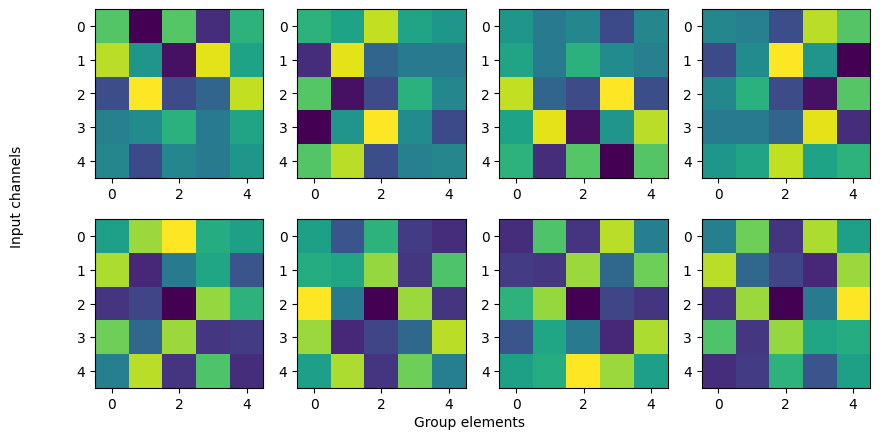

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# pick an output channel to visualize
out_channel_idx = 0

# create [in_channels, group_elements] figures
fig, ax = plt.subplots(weights.shape[2], weights.shape[1])

for in_channel in range(weights.shape[2]):
  for group_elem in range(weights.shape[1]):
    ax[in_channel, group_elem].imshow(
        weights[out_channel_idx, group_elem, in_channel, :, :].detach().numpy(),
        cmap="viridis"
    )

fig.text(0.5, 0.04, 'Group elements', ha='center')
fig.text(0.04, 0.5, 'Input channels', va='center', rotation='vertical')

plt.show()
